In [1]:
%matplotlib notebook
import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from fridge import Fridge
from tes import TES
from QET import QET
from detector import Detector
from PD4 import PD4
from electronics import Electronics
from absorber import Absorber
from simulated_noise import simulate_noise
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from MaterialProperties import TESMaterial

In [2]:
printing = False 
fSnolab = Fridge("SNOLAB", 20e-3, 145e-3, 900e-3, 4.8, 0)
# Absorber: Silicon. Height 1mm. Radius 38.1mm. W safety 3mm. 
absorber = Absorber("Si", "cylinder", 1e-3, 38.1e-3, 3e-3, printing) # same as matlab
eSnolab = Electronics(fSnolab, fSnolab.get_TCP(), fSnolab.get_TMC())
eSLAC = Electronics(fSnolab, fSnolab.get_TMC(), fSnolab.get_TMC(), 5e-3, 6e-3, 25e-9, 25e-9, 4e-12)

tungsten = TESMaterial()

In [3]:
#PD2 ~Upgrade~ input values 
tes_l = 140e-6 # same as matlab
tes_w = 3e-6 # this is what we want, Fabrication is questionable (PD2 turned out to be 3.5)
# standard tes width we can do at Stanford: 2.5um (Matt will check)
# at TAMU tes width can do 3 um 
#foverlap = 1.2 # same as matlab (why greater than 1??)
#foverlap = 0.8 # same as matlab (why greater than 1??)
n_fin = 6
#l_fin = 200e-6 # same as matlab
h_fin = 600e-9 # same as matlab
sigma = tungsten._gPep_v
T_eq = -100
res_n = 300e-3 # want 100 mOhm 
l_overlaps = [4e-6, 6e-6, 8e-6, 10e-6, 12e-6, 14e-6, 16e-6, 18e-6, 20e-6, 22e-6] # radius of fin connector
l_fins = [50e-6, 75e-6, 100e-6, 125e-6, 200e-6, 250e-6, 275e-6, 300e-6, 350e-6]
l_fins_mu = []
l_overlaps_mu = []
for l_o in l_overlaps:
    l_overlaps_mu.append(l_o*(10**6))

<IPython.core.display.Javascript object>


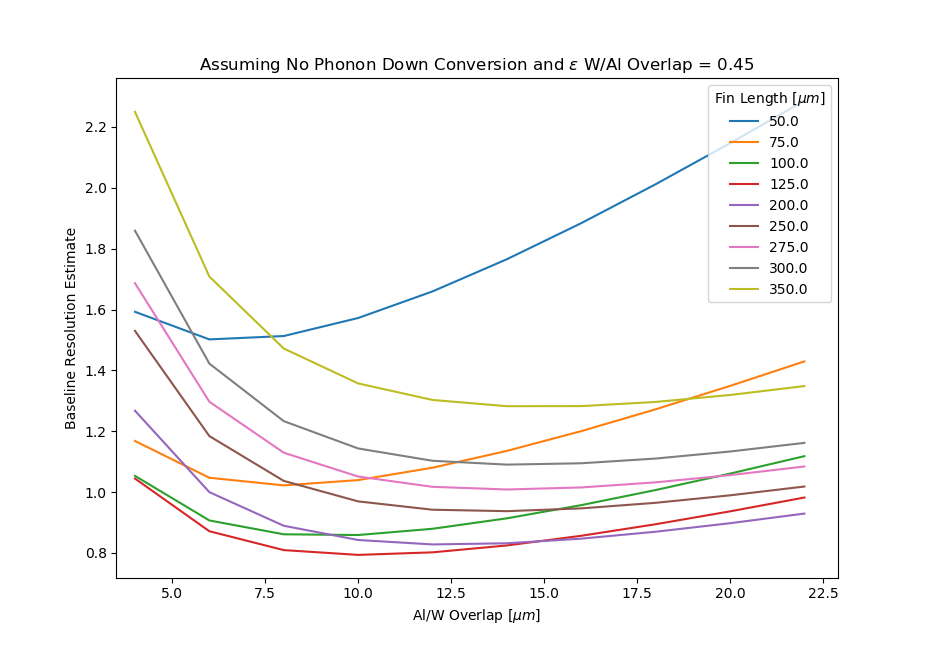

Active Surface Area  2.8307082069415356e-05
Percent Active SA  0.003024220845570891
Base Resolution  0.7934385872572726
N tes  374


In [4]:
f, ax = plt.subplots(1)
for l_f in l_fins:
    l_fins_mu.append(l_f*(10**6))
    sigma_e = []
    for l_over in l_overlaps: 
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten, printing)
        qet = QET( l_f, h_fin, tes)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if l_f == 125e-6 and l_over == 10e-6:
            pArea = det._SA_active/det._absorber.get_SA()
            print("Active Surface Area ", det._SA_active)
            print("Percent Active SA ", pArea)
            print("Base Resolution ", e_res)
            print("N tes ", det._tes._nTES)
    fin_string = "{}"
    ax.plot(l_overlaps_mu, sigma_e, label = fin_string.format(l_f*(10**6)) )
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin =3.5)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate")
plt.show()

<IPython.core.display.Javascript object>


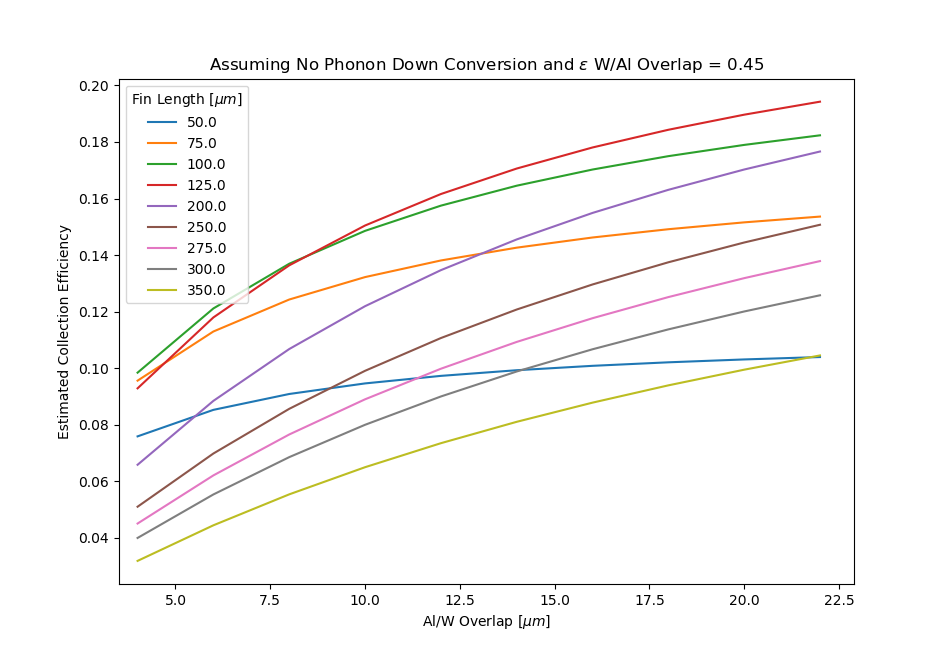

In [5]:
f, ax = plt.subplots(1)
for l_f in l_fins:
    tot_e = []
    for l_over in l_overlaps:
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten , printing)
        qet = QET( l_f, h_fin, tes)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1)
        tot_e.append(det._eEabsb)
    fin_string = "{}"
    ax.plot(l_overlaps_mu, tot_e, label = fin_string.format(l_f*(10**6)) )
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin =3.5)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Estimated Collection Efficiency")
plt.show()

<IPython.core.display.Javascript object>


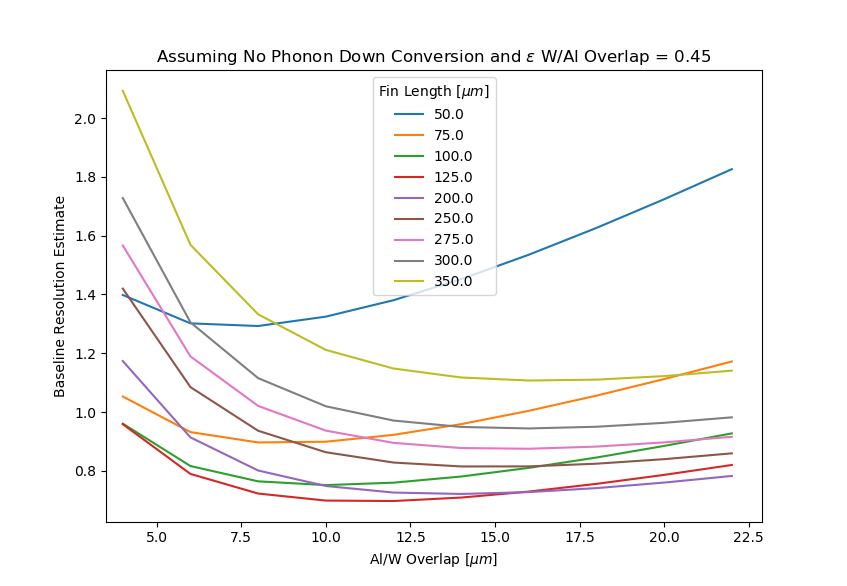

Active Surface Area  2.9092482069415353e-05
Percent Active SA  0.0031081299905080764
Base Resolution  0.698887718492903
N tes  374


In [6]:
n_fin = 4
f, ax = plt.subplots(1)
for l_f in l_fins:
    l_fins_mu.append(l_f*(10**6))
    sigma_e = []
    for l_over in l_overlaps: 
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45,  tungsten ,printing)
        qet = QET( l_f, h_fin, tes)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if l_f == 125e-6 and l_over == 10e-6:
            pArea = det._SA_active/det._absorber.get_SA()
            print("Active Surface Area ", det._SA_active)
            print("Percent Active SA ", pArea)
            print("Base Resolution ", e_res)
            print("N tes ", det._tes._nTES)
    fin_string = "{}"
    ax.plot(l_overlaps_mu, sigma_e, label = fin_string.format(l_f*(10**6)) )
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin =3.5)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate")
plt.show()
# Looks like it improves for 4 fins (from 6) but increaseing effective l_fin/more angular coverage for each fin ?? 
# --> loss to diffusion? 
# Do we trust the n_tes for this Rn ? 
# Only .3% total absorber SA coverage! Need to add in some phonon down coversion and see if this still holds! 

In [7]:
n_fin = 6
res_n = 150e-3 # want 100 mOhm 

<IPython.core.display.Javascript object>


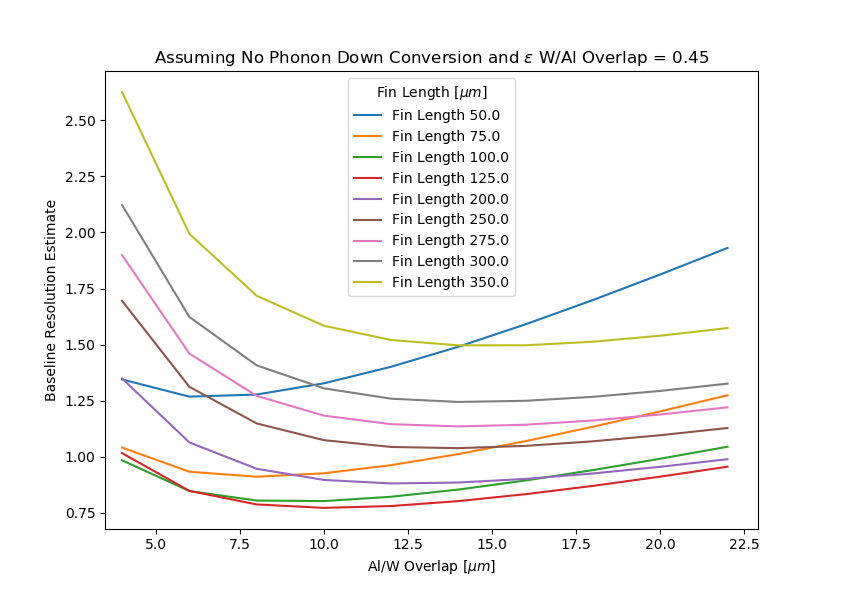

Active Surface Area  5.653847675361837e-05
Percent Active SA  0.006040355539148277
Base Resolution  0.7721229689766187


In [8]:
f, ax = plt.subplots(1)
for l_f in l_fins:
    l_fins_mu.append(l_f*(10**6))
    sigma_e = []
    for l_over in l_overlaps: 
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten,  printing)
        qet = QET( l_f, h_fin, tes)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if l_f == 125e-6 and l_over == 10e-6:
            pArea = det._SA_active/det._absorber.get_SA()
            print("Active Surface Area ", det._SA_active)
            print("Percent Active SA ", pArea)
            print("Base Resolution ", e_res)
    fin_string = "Fin Length {}"
    ax.plot(l_overlaps_mu, sigma_e, label = fin_string.format(l_f*(10**6)) )
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin =3.5)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate")
plt.show()

In [9]:
tes_l = 200e-6 

<IPython.core.display.Javascript object>


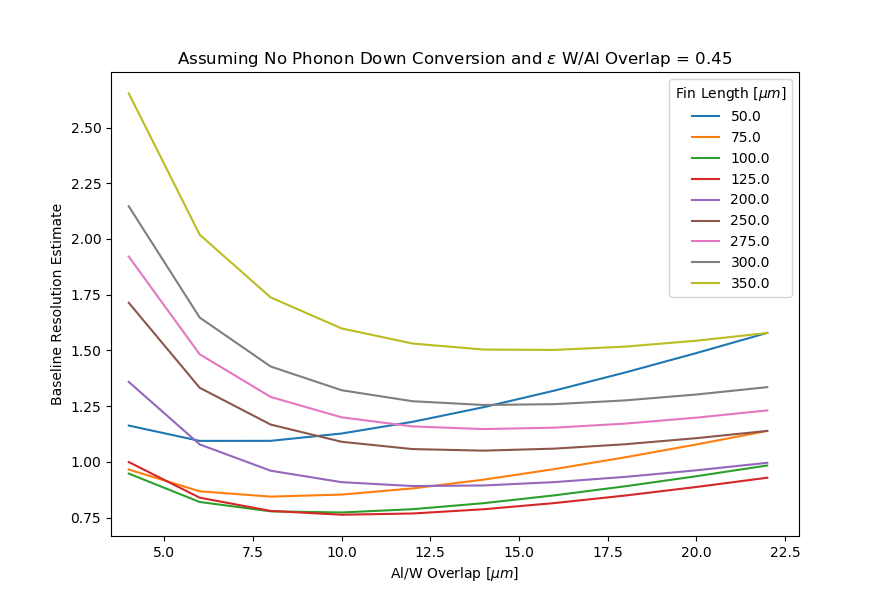

Active Surface Area  9.580314002156733e-05
Percent Active SA  0.010235242629879258
N tes  1067
Base Resolution  0.7627497777959452
Rn  0.14995313964386128


In [10]:
f, ax = plt.subplots(1)
for l_f in l_fins:
    l_fins_mu.append(l_f*(10**6))
    sigma_e = []
    for l_over in l_overlaps: 
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten , printing)
        qet = QET( l_f, h_fin, tes)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if l_f == 125e-6 and l_over == 10e-6:
            pArea = det._SA_active/det._absorber.get_SA()
            print("Active Surface Area ", det._SA_active)
            print("Percent Active SA ", pArea)
            print("N tes ", det._tes._nTES)
            print("Base Resolution ", e_res)
            print("Rn ", det._tes._total_res_n)
    fin_string = "{}"
    ax.plot(l_overlaps_mu, sigma_e, label = fin_string.format(l_f*(10**6)) )
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin =3.5)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate")
plt.show()

<IPython.core.display.Javascript object>


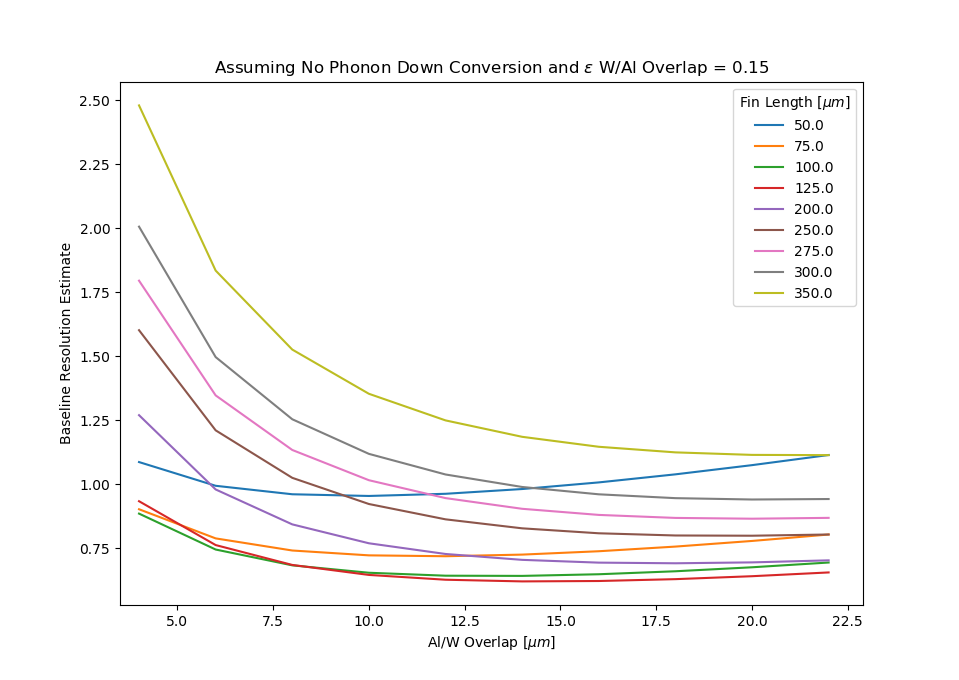

Active Surface Area  9.580314002156733e-05
Percent Active SA  0.010235242629879258
N tes  1067
Base Resolution  0.6458839333447174
Rn  0.14995313964386128


In [11]:
f, ax = plt.subplots(1)
for l_f in l_fins:
    l_fins_mu.append(l_f*(10**6))
    sigma_e = []
    for l_over in l_overlaps: 
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.15, tungsten ,  printing)
        qet = QET( l_f, h_fin, tes)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if l_f == 125e-6 and l_over == 10e-6:
            pArea = det._SA_active/det._absorber.get_SA()
            print("Active Surface Area ", det._SA_active)
            print("Percent Active SA ", pArea)
            print("N tes ", det._tes._nTES)
            print("Base Resolution ", e_res)
            print("Rn ", det._tes._total_res_n)
    fin_string = "{}"
    ax.plot(l_overlaps_mu, sigma_e, label = fin_string.format(l_f*(10**6)) )
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.15")
ax.set_xlim(xmin =3.5)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate")
plt.show()